# OpenCV

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img1= cv.imread("Luff2.jpg")

In [3]:
# cv.imshow("Luffy", img1)
# cv.waitKey(0)
print(type(img1))

<class 'numpy.ndarray'>


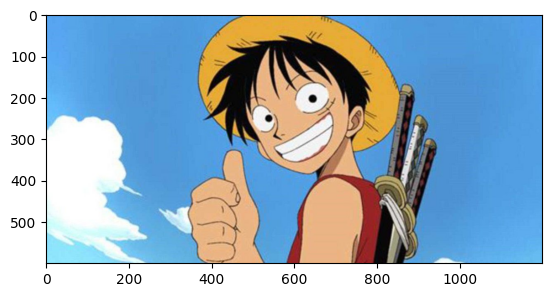

In [4]:
plt.imshow(img1[...,::-1])

### Resize image

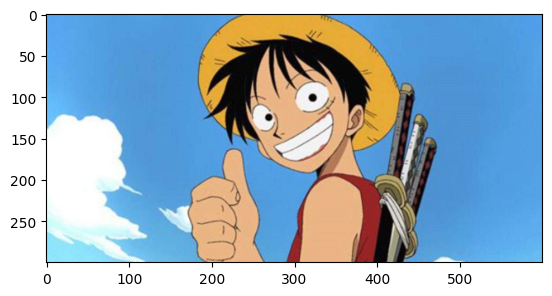

In [5]:
width= int(img1.shape[0]* 0.5)
height= int(img1.shape[1]* 0.5)
img2= cv.resize(img1, (600, 300), interpolation= cv.INTER_AREA)
plt.imshow(img2[...,::-1])

In [6]:
print("original dimensions: ", np.shape(img1))
print("resized dimensions: ", np.shape(img2))

original dimensions:  (600, 1200, 3)
resized dimensions:  (300, 600, 3)


In [7]:
img1.shape

(600, 1200, 3)

### Showing only one color of rgb

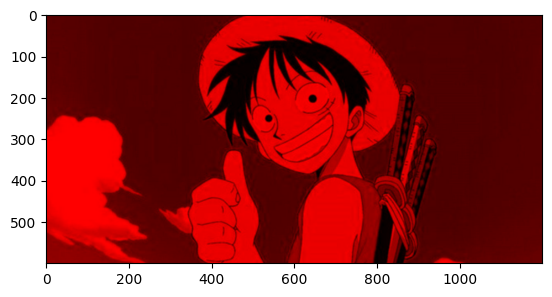

In [8]:
#Red only
red_img1= np.copy(img1)
red_img1[:,:,0:2]= 0
plt.imshow(red_img1[:,:,::-1])

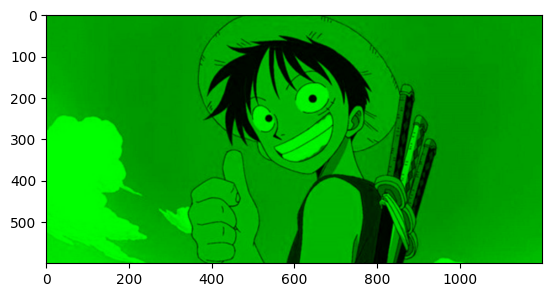

In [9]:
#Green only
green_img1= np.copy(img1)
green_img1[:,:,[0,2]]= 0
plt.imshow(green_img1[:,:,::-1])

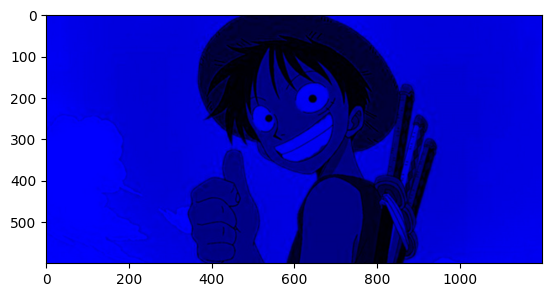

In [10]:
#Blue only
blue_img1= np.copy(img1)
blue_img1[:,:,1:3]= 0
plt.imshow(blue_img1[:,:,::-1])

### Convert BGR to grayscale

In [14]:
grayImg= cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

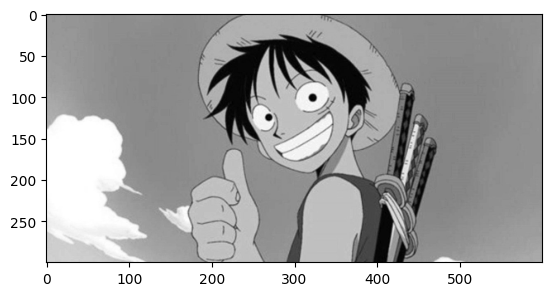

In [16]:
plt.imshow(grayImg, cmap= "gray")

### Flip image

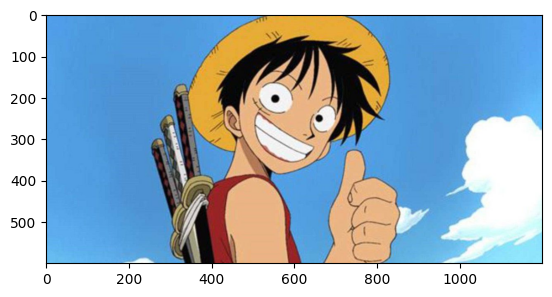

In [19]:
plt.imshow(cv.cvtColor(cv.flip(img1, 1), cv.COLOR_BGR2RGB))

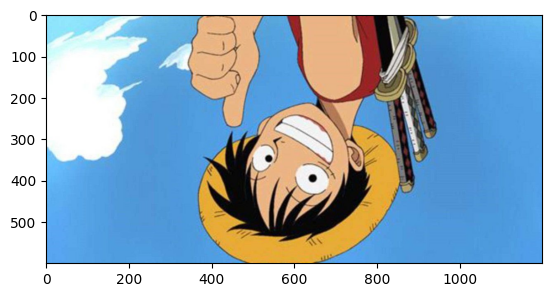

In [20]:
plt.imshow(cv.cvtColor(cv.flip(img1, 0), cv.COLOR_BGR2RGB))

### Rotate image

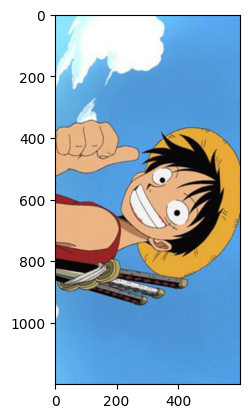

In [22]:
plt.imshow(cv.cvtColor(cv.rotate(img1, cv.ROTATE_90_CLOCKWISE), cv.COLOR_BGR2RGB))

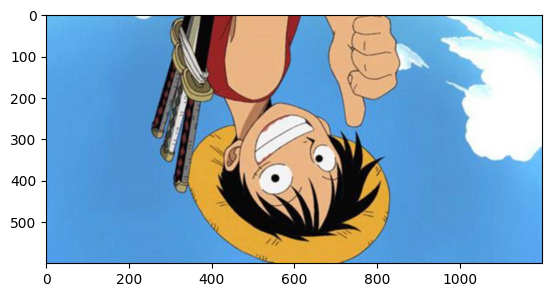

In [23]:
plt.imshow(cv.cvtColor(cv.rotate(img1, cv.ROTATE_180), cv.COLOR_BGR2RGB))

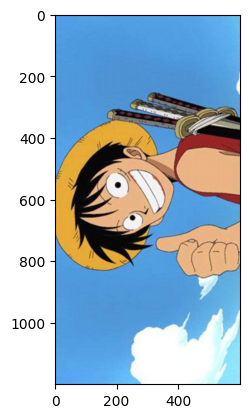

In [24]:
plt.imshow(cv.cvtColor(cv.rotate(img1, cv.ROTATE_90_COUNTERCLOCKWISE), cv.COLOR_BGR2RGB))

### Drawing shapes on images

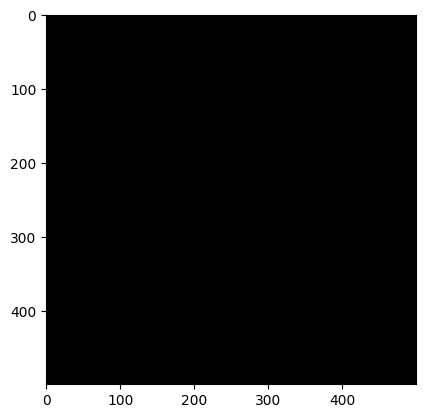

In [ ]:
blank= np.zeros((500,500,3), dtype="uint8")
plt.imshow(blank[:,:,::-1])

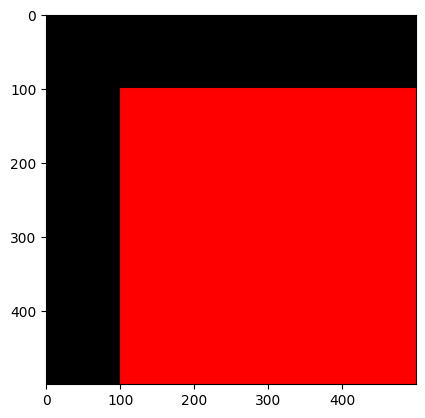

In [ ]:
blank[100:500,100:500,2]= 255
plt.imshow(blank[:,:,::-1])

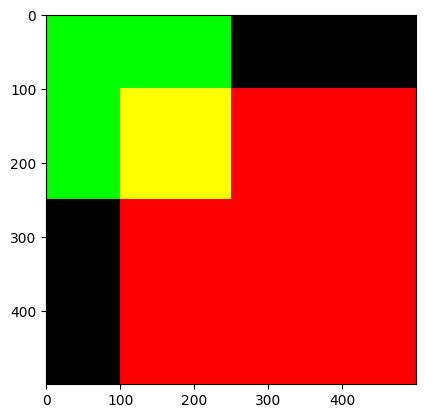

In [ ]:
blank[0:250, 0:250, 1]= 255
plt.imshow(blank[:,:,::-1])

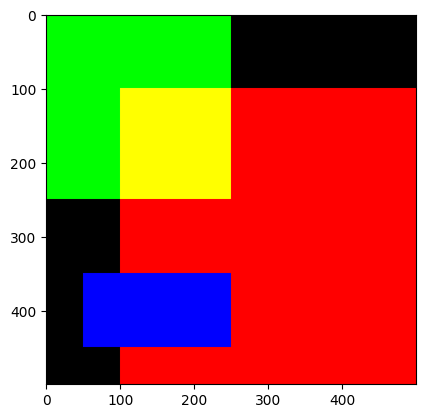

In [ ]:
blank[350:450, 50:250]= 255,0,0
plt.imshow(blank[:,:,::-1])

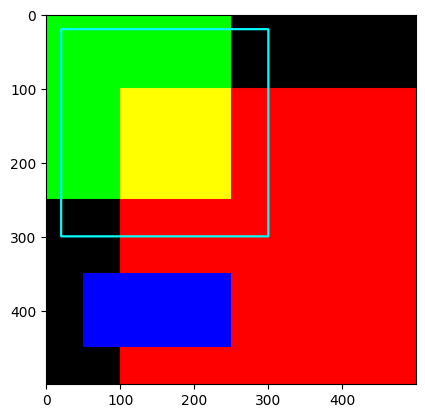

In [ ]:
cv.rectangle(blank, (20,20), (300,300), (255,255,0), 2)
plt.imshow(blank[:,:,::-1])

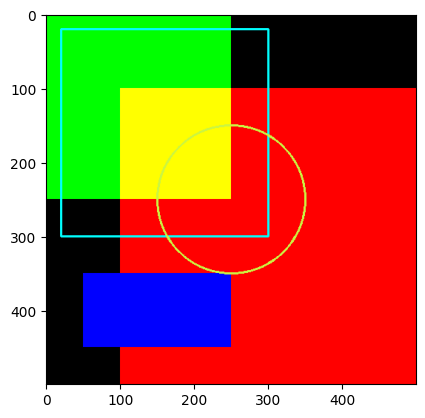

In [ ]:
cv.circle(blank, (250,250), 100, (66, 245, 203), 2)
plt.imshow(blank[:,:,::-1])

### Plot histogram

Ploting histogram of a gray scale image

In [27]:
hist= cv.calcHist([grayImg],[0],None,[256],[0,256])
intensity= np.array([x for x in range(256)])

In [37]:
(hist[:,0])

numpy.ndarray

<BarContainer object of 256 artists>

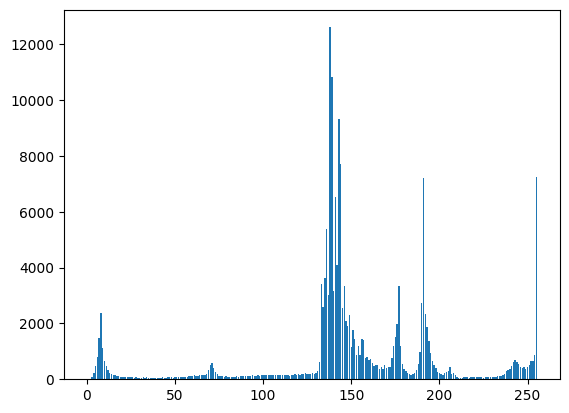

In [31]:
plt.bar(intensity, hist[:, 0])

Plotting histogram of a rgb image

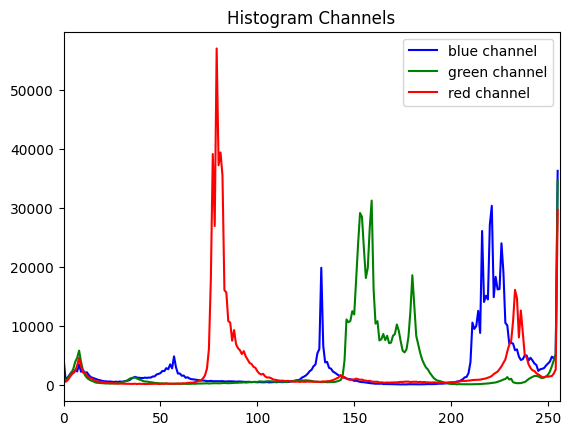

In [44]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(intensity,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

### Negative of grayscale image

Text(0.5, 1.0, 'Inverted')

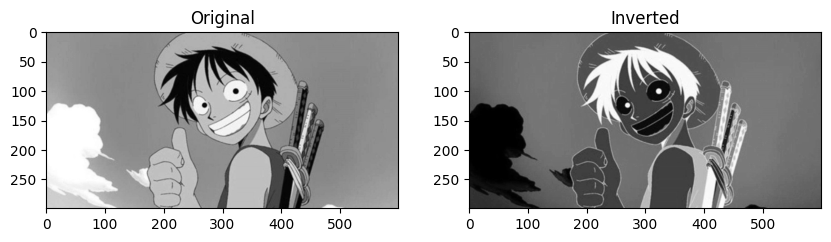

In [53]:
# inverted= np.zeros(grayImg.shape, dtype= "uint8")
# for x in range(grayImg.shape[0]):
#     for y in range(grayImg.shape[1]):
#         inverted[x,y]= 255-grayImg[x,y]

inverted= 255- grayImg

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(grayImg, cmap= "gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(inverted, cmap= "gray")
plt.title("Inverted")

### Changing brightness

Text(0.5, 1.0, 'Darker')

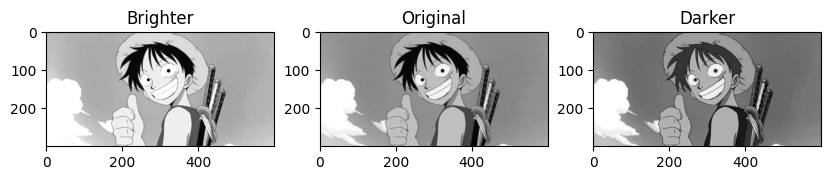

In [63]:
brighter= cv.convertScaleAbs(grayImg, alpha= 1, beta= 50)
darker= cv.convertScaleAbs(grayImg, alpha= 1, beta= -50)

plt.figure(figsize=(10,10))
plt.subplot(1,3,2)
plt.imshow(grayImg, cmap= "gray")
plt.title("Original")
plt.subplot(1,3,1)
plt.imshow(brighter, cmap= "gray")
plt.title("Brighter")
plt.subplot(1,3,3)
plt.imshow(darker, cmap="gray")
plt.title("Darker")

In [67]:
histB= cv.calcHist([brighter], [0], None, [256], [0, 256])
histD= cv.calcHist([darker], [0], None, [256], [0, 256])
histO= cv.calcHist([grayImg], [0], None, [256], [0, 256])

<BarContainer object of 256 artists>

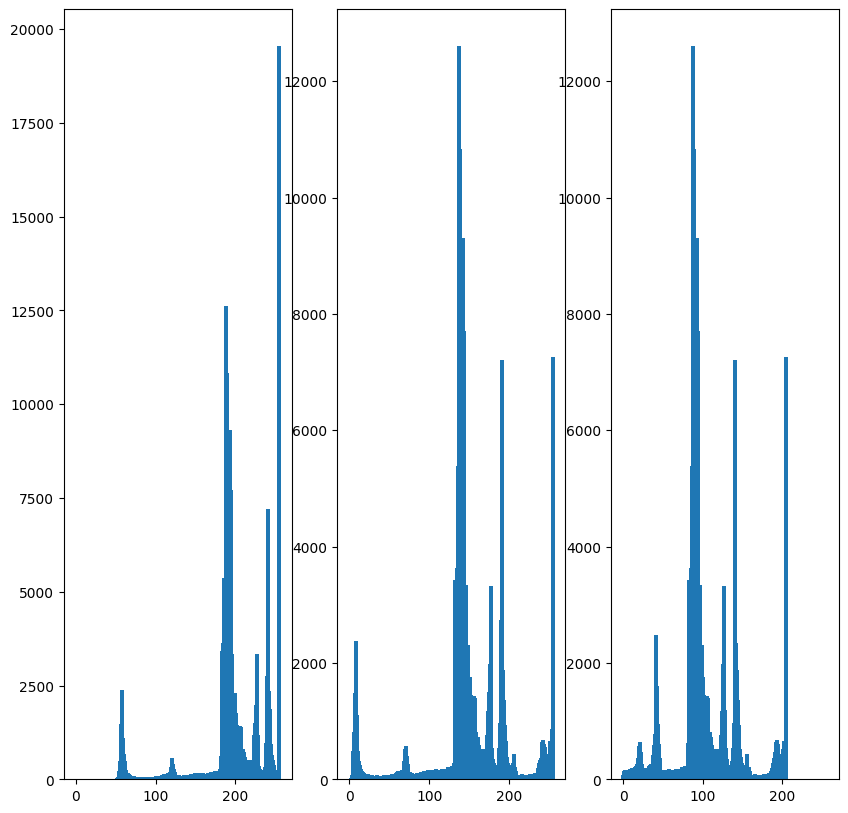

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.bar(intensity, histB[:, 0], width= 5)
plt.subplot(1,3,2)
plt.bar(intensity, histO[:, 0], width= 5)
plt.subplot(1,3,3)
plt.bar(intensity, histD[:, 0], width= 5)

### Changing contrast linearly

Text(0.5, 1.0, 'High contrast')

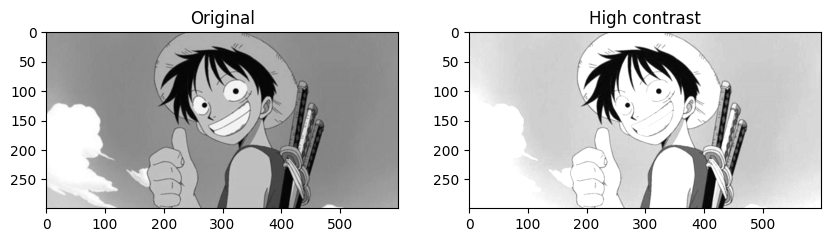

In [66]:
highCont= cv.convertScaleAbs(grayImg, alpha= 1.5)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(grayImg, cmap= "gray")
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(highCont, cmap= "gray")
plt.title("High contrast")